# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
srn.set()

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [2]:
base = pd.read_csv('../demo01.csv')
print(base.shape)
base.head()

(16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
# com info conseguimos ver os valores faltantes e também o dtype
print(base.info())
base.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,16650,2,F,11201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posse_de_veiculo,16650,2,N,10178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posse_de_imovel,16650,2,Y,11176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtd_filhos,16650.0,NaN,NaN,NaN,0.433153,0.739395,0.0,0.0,0.0,1.0,14.0
tipo_renda,16650,5,Working,8565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educacao,16650,5,Secondary / secondary special,11245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado_civil,16650,5,Married,11680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_residencia,16650,6,House / apartment,14974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idade,16650.0,NaN,NaN,NaN,44.319513,11.228837,22.030137,34.873973,43.493151,53.410959,68.909589
tempo_emprego,16650.0,NaN,NaN,NaN,-161.416446,376.843912,-1000.665753,1.183562,4.691781,9.088356,42.906849


In [4]:
base.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [5]:
base['mau'].value_counts()

False    16260
True       390
Name: mau, dtype: int64

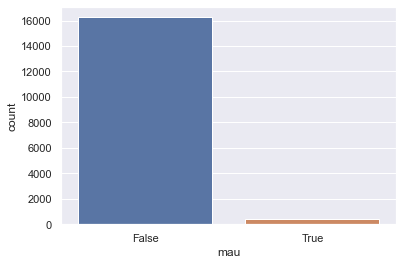

In [6]:
srn.countplot(data=base, x='mau');

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [7]:
# 1
metadados = pd.DataFrame({'dtype':base.dtypes})
# 2
for variavel in base.columns:
    metadados.loc[variavel, 'qtd_categorias'] = base[variavel].nunique()
metadados

,dtype,qtd_categorias
sexo,object,2.0
posse_de_veiculo,object,2.0
posse_de_imovel,object,2.0
qtd_filhos,int64,8.0
tipo_renda,object,5.0
educacao,object,5.0
estado_civil,object,5.0
tipo_residencia,object,6.0
idade,float64,5298.0
tempo_emprego,float64,3005.0


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [8]:
base = base.copy()
colunas_dummy = base.columns[:3].append(base.columns[4:8]).append(base.columns[10:14])
#print(colunas_dummy)
base_encoded = pd.get_dummies(base, columns=colunas_dummy, drop_first=True)
base_encoded.head(5)

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y,tipo_renda_Pensioner,tipo_renda_State servant,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,possui_fone_comercial_1,possui_fone_1,possui_email_1
0,0,58.832877,3.106849,2.0,False,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1.0,False,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
2,0,52.356164,8.358904,1.0,False,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
3,0,46.224658,2.106849,2.0,False,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,0,29.230137,3.021918,2.0,False,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [16]:
pd.crosstab(columns=base.mau, index=[base['possui_email'],base['posse_de_veiculo']], margins=True)

mau                            False  True    All
possui_email posse_de_veiculo                    
0            N                  9108   233   9341
             Y                  5702   127   5829
1            N                   823    14    837
             Y                   627    16    643
All                            16260   390  16650

A variável 'posse_de_veiculo' é mais poderosa pois apresenta uma maior quantidade de instância com risco de crédito (mau=True), do que a variável 'possui_email'.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [ ]:
#base_encoded.to_csv('../base_encoded.csv', index=False)